In [28]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 


W0812 14:05:15.846170 12444 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.0, Runtime API Version: 10.1
W0812 14:05:15.847803 12444 device_context.cc:422] device: 0, cuDNN Version: 8.0.


PaddlePaddle works well on 1 GPU.
PaddlePaddle works well on 1 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


## 一、训练（train.py）

### 1.1 训练实例 

In [ ]:
export CUDA_VISIBLE_DEVICES=0 #windows和Mac下不需要执行该命令
python tools/train.py -c configs/yolov3/yolov3_mobilenet_v1_roadsign.yml

### 1.2 模型恢复训练

In [ ]:
export CUDA_VISIBLE_DEVICES=0 #windows和Mac下不需要执行该命令
python tools/train.py -c configs/yolov3/yolov3_mobilenet_v1_roadsign.yml
                        --use_vdl=true \
                        --vdl_log_dir=vdl_dir/scalar \

## 二、测试（eval.py）

### 2.1 测试实例

In [ ]:
export CUDA_VISIBLE_DEVICES=0 #windows和Mac下不需要执行该命令
python tools/eval.py -c configs/yolov3/yolov3_mobilenet_v1_roadsign.yml -o weights=https://paddledet.bj.bcebos.com/models/yolov3_mobilenet_v1_roadsign.pdparams

### 2.2 边训练边

In [ ]:
export CUDA_VISIBLE_DEVICES=0,1,2,3,4,5,6,7 #windows和Mac下不需要执行该命令
python -m paddle.distributed.launch --gpus 0,1,2,3,4,5,6,7 tools/train.py -c configs/yolov3/yolov3_mobilenet_v1_roadsign.yml --eval

## 三、检测（infer.py）

### 3.1 参数及说明

模型主要参数跟YOLO是一样的，一个--data文件下包含多个配置文件

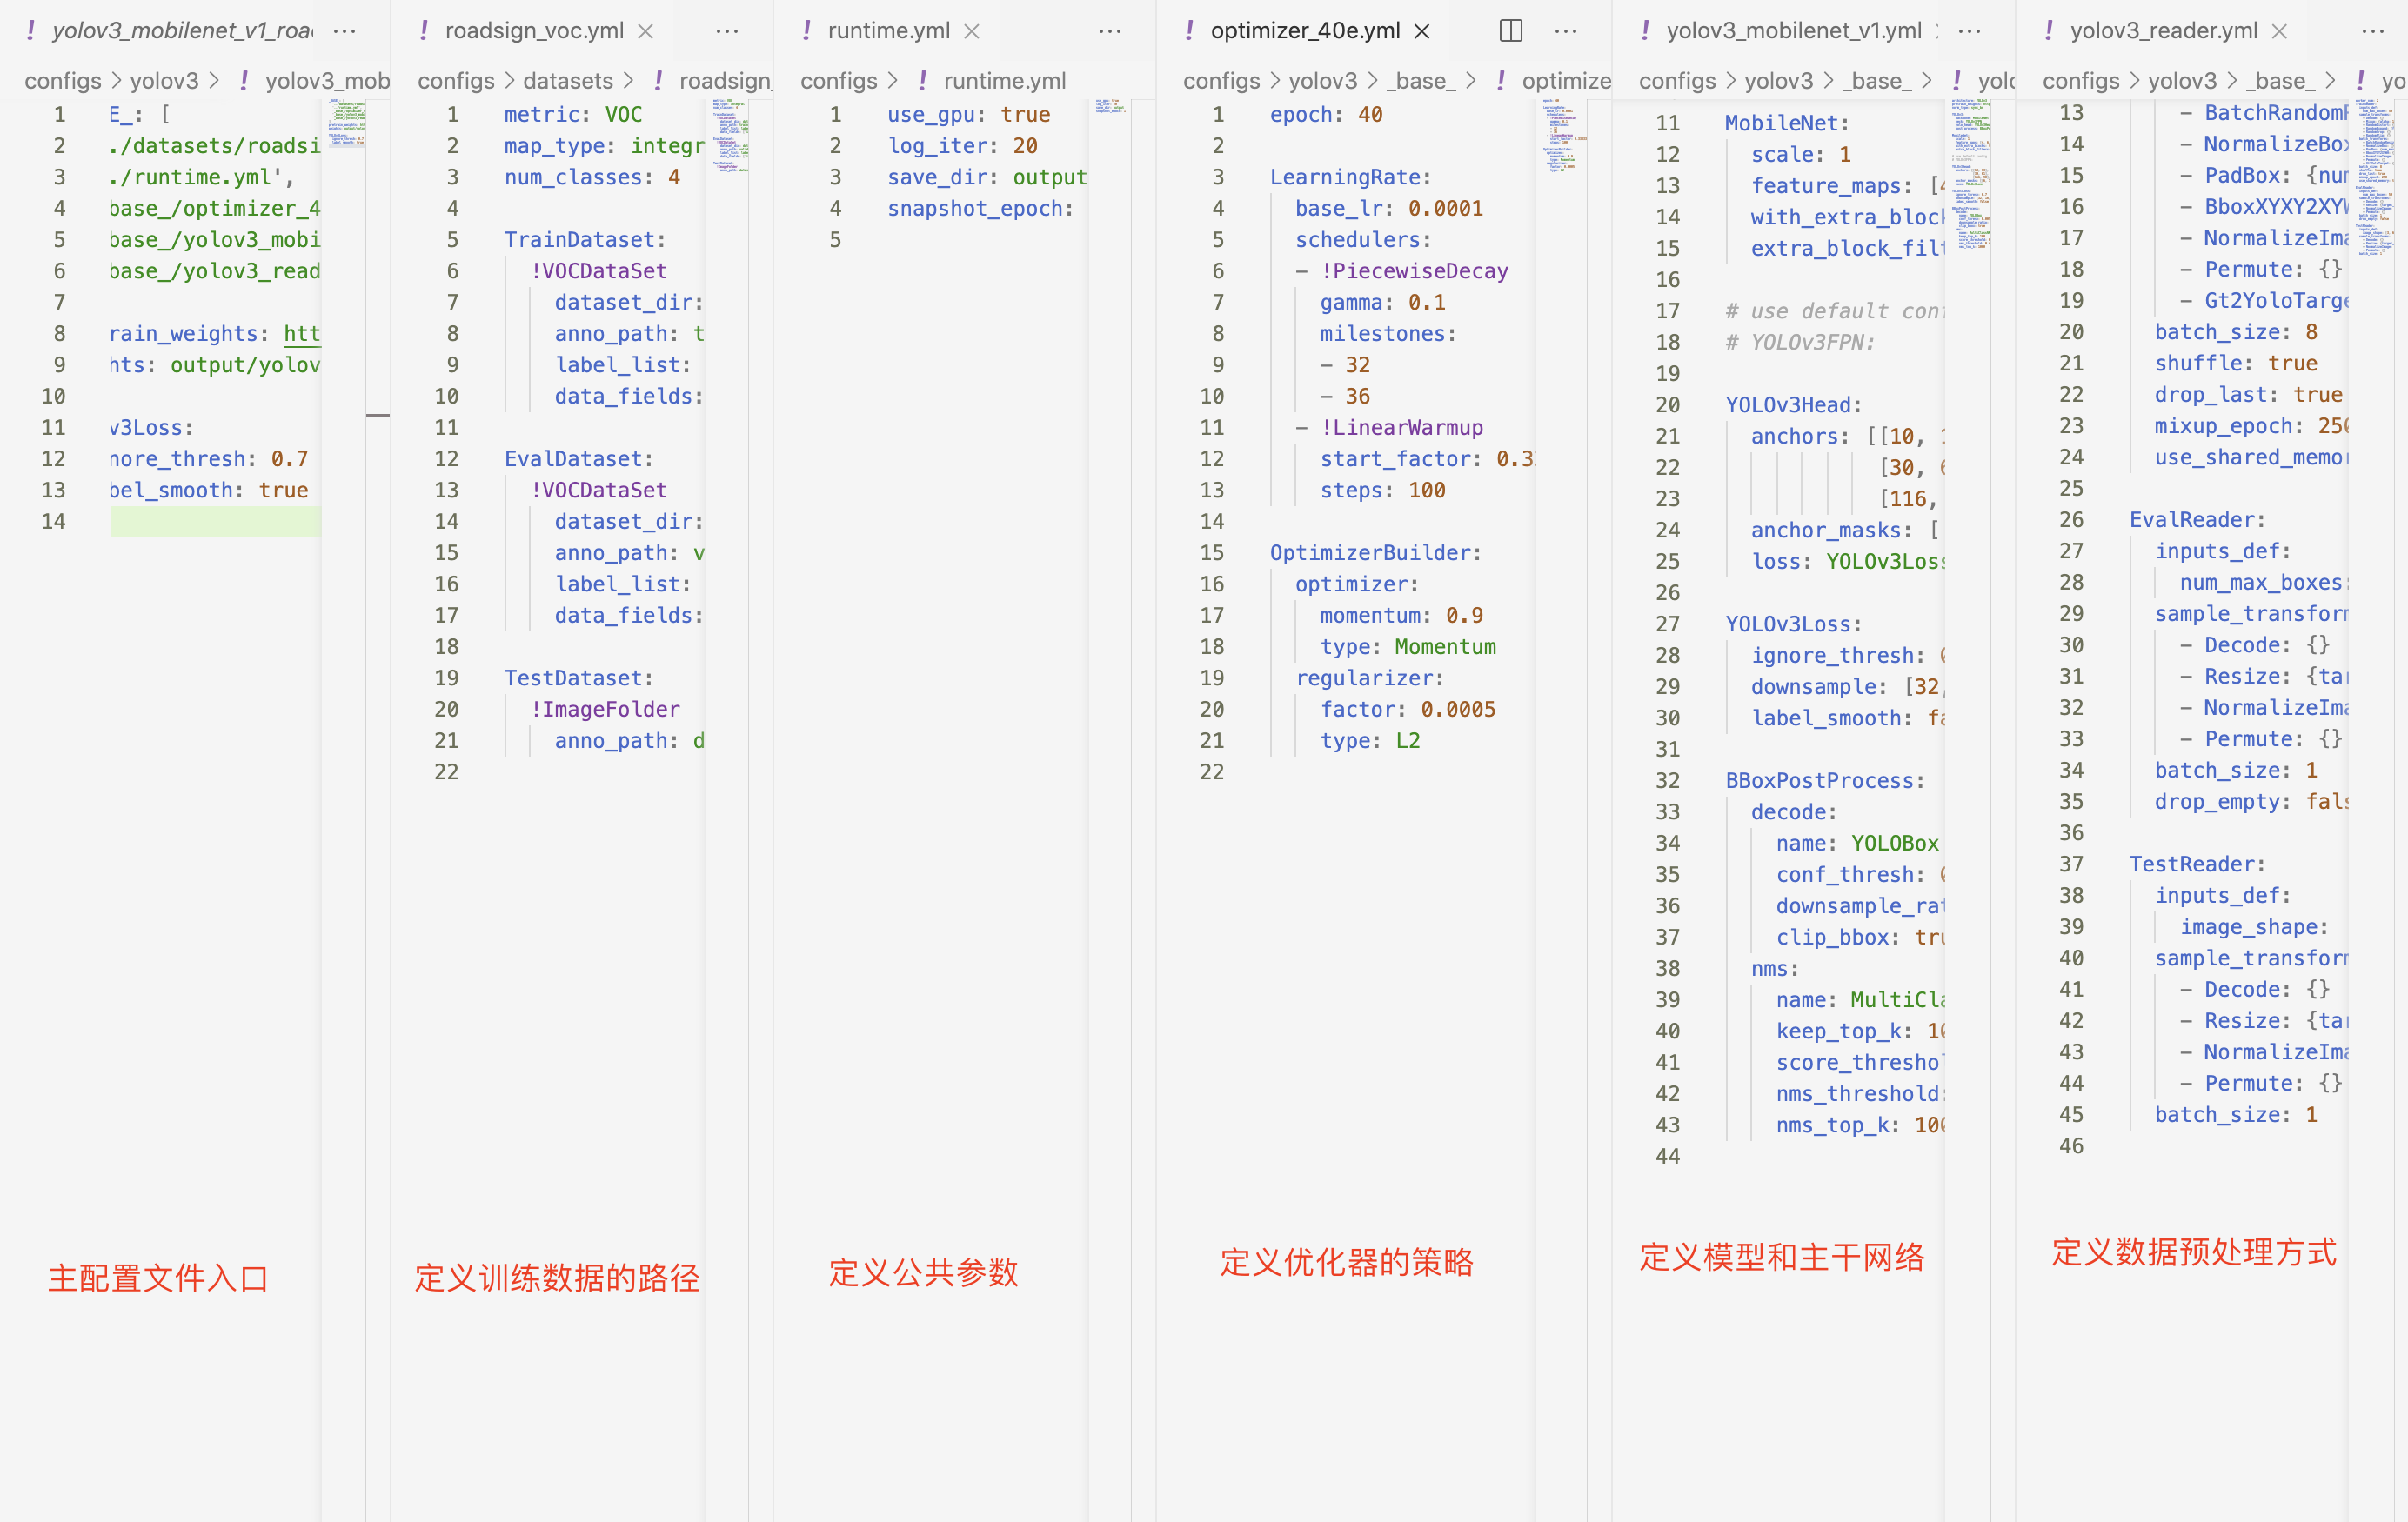

### 3.2 export pdparams 模型文件

In [17]:
!python3 tools/export_model.py -c configs/pedestrian/pedestrian_yolov3_darknet.yml --output_dir=./models/inference_model \
 -o weights=./models/pedestrian/pedestrian_yolov3_darknet.pdparams

[08/12 13:53:12] ppdet.utils.checkpoint INFO: Finish loading model weights: ./models/pedestrian/pedestrian_yolov3_darknet.pdparams
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[08/12 13:53:12] ppdet.engine INFO: Export inference config file to ./models/inference_model/pedestrian_yolov3_darknet/infer_cfg.yml
/home/yolov5test/.local/lib/python3.8/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  return (isinstance(seq, collections.Sequence) and
W0812 13:53:13.554215 18581 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.0, Runtime API Version: 10.1
W0812 13:53:13.554235 18581 device_context.cc:422] device: 0, cuDNN Version: 8.0.
[08/12 13:53:15] ppdet.engine INFO: Export model and saved in ./models/inference_model/pedestrian_yolov3_darknet

### 3.3 检测实例

In [2]:
!nautilus ../results

Nautilus-Share-Message: 14:21:48.238: Called "net usershare info" but it failed: 执行子进程“net”失败（No such file or directory）


In [6]:
!export CUDA_VISIBLE_DEVICES=0
!python3 -u ./deploy/python/infer.py --model_dir ./models/pedestrian_yolov3_darknet \
                         --video_file  ../detections/dam4.mp4 \
                         --output_dir ../results/ \
                         --use_gpu=True \
                         --batch_size=2

-----------  Running Arguments -----------
batch_size: 2
camera_id: -1
cpu_threads: 1
enable_mkldnn: False
image_dir: None
image_file: None
model_dir: ./models/pedestrian_yolov3_darknet
output_dir: ../results/
run_benchmark: False
run_mode: fluid
threshold: 0.5
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_dynamic_shape: False
use_gpu: True
video_file: ../detections/dam4.mp4
------------------------------------------
-----------  Model Configuration -----------
Model Arch: YOLO
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------
frame_count 4501
detect frame:1


--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
0   paddle::framework::SignalHandle(char const*, int)
1   paddle::platform::GetCurrentTraceBackString[abi:cxx11]()

----------------------
Error Message Summary:
----------------------
Fata

In [5]:
!ffplay ../results/dam2.mp4

ffplay version 4.2.4-1ubuntu0.1 Copyright (c) 2003-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

## 四、VDL可视化